In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hospital-tools-dataset/data_isya/README.dataset.txt
/kaggle/input/hospital-tools-dataset/data_isya/README.roboflow.txt
/kaggle/input/hospital-tools-dataset/data_isya/data.yaml
/kaggle/input/hospital-tools-dataset/data_isya/valid/labels.cache
/kaggle/input/hospital-tools-dataset/data_isya/valid/labels/o36_jpg.rf.fc86e6a7e0f10e6921c8bd66c9f72e3c.txt
/kaggle/input/hospital-tools-dataset/data_isya/valid/labels/vi40_jpg.rf.3ec06b96488cb6bc228cfc62fda33cce.txt
/kaggle/input/hospital-tools-dataset/data_isya/valid/labels/h42_jpg.rf.84f02b3abd9ce4535b7017f67207b0e7.txt
/kaggle/input/hospital-tools-dataset/data_isya/valid/labels/h37_jpg.rf.9c050d172966ebe517ecba0c2642c5b1.txt
/kaggle/input/hospital-tools-dataset/data_isya/valid/labels/vi41_jpg.rf.f1776c7a4bcf31a1b8bc9aed371b2706.txt
/kaggle/input/hospital-tools-dataset/data_isya/valid/labels/m44_jpg.rf.42e05563c1df81b691dcb85d87b2aa45.txt
/kaggle/input/hospital-tools-dataset/data_isya/valid/labels/h45_jpg.rf.ef360b370582ce6aee78440

In [2]:
!pip install rich

In [3]:
from rich.tree import Tree
from rich.console import Console
import os

def generate_tree(path, tree):
    for entry in os.scandir(path):
        if entry.is_dir():
            branch = tree.add(f"[bold blue]{entry.name}[/]")
            generate_tree(entry.path, branch)
        else:
            tree.add(entry.name)

def print_directory_tree(startpath):
    console = Console()
    tree = Tree(f"[bold green]{startpath}[/]")
    generate_tree(startpath, tree)
    console.print(tree)

# Example usage
print_directory_tree('/kaggle/input/hospital-tools-dataset/data_isya/')


/kaggle/input/hospital-tools-dataset/data_isya/
├── README.dataset.txt
├── README.roboflow.txt
├── data.yaml
├── valid
│   ├── labels
│   │   ├── o36_jpg.rf.fc86e6a7e0f10e6921c8bd66c9f72e3c.txt
│   │   ├── vi40_jpg.rf.3ec06b96488cb6bc228cfc62fda33cce.txt
│   │   ├── h42_jpg.rf.84f02b3abd9ce4535b7017f67207b0e7.txt
│   │   ├── h37_jpg.rf.9c050d172966ebe517ecba0c2642c5b1.txt
│   │   ├── vi41_jpg.rf.f1776c7a4bcf31a1b8bc9aed371b2706.txt
│   │   ├── m44_jpg.rf.42e05563c1df81b691dcb85d87b2aa45.txt
│   │   ├── h45_jpg.rf.ef360b370582ce6aee784404b805df78.txt
│   │   ├── b40_jpg.rf.6270b9e9826bdbdcd7654bcffc72217c.txt
│   │   ├── o41_jpg.rf.038d842c72e706f7cfa72141563c3e74.txt
│   │   ├── o43_jpg.rf.ed40eadf3f9b126c8aefb9301108a14c.txt
│   │   ├── vi42_jpg.rf.7ddc1d9bcec9687f91df092561cc7afe.txt
│   │   ├── b45_jpg.rf.346bf905d90cc20e880174be9148b23e.txt
│   │   ├── b41_jpg.rf.821c281b600e243db3dce559c8938a35.txt
│   │   ├── m43_jpg.rf.79a4443f38d85baf4a6d8c271d9383af.txt
│   │   ├── b39_jpg.rf.734980b9e0c59b164dd41493b9b66d39.txt
│   │   ├── va37_jpg.rf.71374dc696f85c7c78db991d4b6cbea7.txt
│   │   ├── m38_jpg.rf.f7b9bf6f767fe18f57ac2da2c880b3a6.txt
│   │   ├── va41_jpg.rf.ebdaaa846487de3aa5a529408c2a3658.txt
│   │   ├── o45_jpg.rf.845b10fc1d56d64d30c05a63b3296931.txt
│   │   ├── h41_jpg.rf.f249bd6e0128361a7e27a3a106997bd3.txt
│   │   ├── b38_jpg.rf.d407bf2a6eefff80ebaa000d42710955.txt
│   │   ├── ve43_jpg.rf.1abd491fc1d2aa90a710581308b43f37.txt
│   │   ├── b37_jpg.rf.ae60fecda41853221ebacd84ecfa2bdd.txt
│   │   ├── ve36_jpg.rf.930faf6810134c24f2c7776dc4724843.txt
│   │   ├── ve37_jpg.rf.122b86c9ae0a5d700346604c9588957d.txt
│   │   ├── ve40_jpg.rf.b1fa34325da64bad0f893509567dfd51.txt
│   │   ├── va38_jpg.rf.c334c29d9ef1e19cf44c2e656c8da65c.txt
│   │   ├── h38_jpg.rf.57e0603e3b25b4556f46044e6dfafbf9.txt
│   │   ├── b43_jpg.rf.226d4c6d9276f6aa4cb132b367fee249.txt
│   │   ├── ve39_jpg.rf.7923bf2c752845309afecbdae721ef6d.txt
│   │   ├── o38_jpg.rf.b7c9f285afa2ab9ba242af9b7636c9c1.txt
│   │   ├── m41_jpg.rf.228d15b17aad1c622ad5d8fcf1f32036.txt
│   │   ├── va45_jpg.rf.d25b88663009ca1ea59a0cea4631291c.txt
│   │   ├── vi38_jpg.rf.ff3d0b386877af7d54b9fce3ac97acba.txt
│   │   ├── va43_jpg.rf.905bddf4baa5386739318bc2aa4303b9.txt
│   │   ├── ve45_jpg.rf.b5fb369eeb081ee34b16887c4cdf9c60.txt
│   │   ├── m37_jpg.rf.376b9d6bd80e5d785388883878cf031b.txt
│   │   ├── h43_jpg.rf.f9bdd218db77ee8d50ff881fb6f9ca50.txt
│   │   ├── va44_jpg.rf.941e251fbab36dff04b9b69480326aab.txt
│   │   ├── m42_jpg.rf.21b34c0791ba9e36fa10f8e150fef660.txt
│   │   ├── ve38_jpg.rf.903a931320c5db255ebc13328b0674af.txt
│   │   ├── vi44_jpg.rf.5e33c12ef15eb2f128e6be46cd2d33ef.txt
│   │   ├── h36_jpg.rf.1ee1b715c53ad9c0b8100fade06db3d7.txt
│   │   ├── b44_jpg.rf.b04655f5cd4dd86e7e805270a33cb505.txt
│   │   ├── vi37_jpg.rf.0ab0332f893a586ea1b6a06394a7aa59.txt
│   │   ├── va40_jpg.rf.79a07f78acc7e9defc19bf1ad6e101da.txt
│   │   ├── vi43_jpg.rf.c8532c9ef912bc3e06c1ab4341c8c684.txt
│   │   ├── va39_jpg.rf.d6c7d61342f150644cea407be56952f5.txt
│   │   ├── va36_jpg.rf.a28f920890189ed6da91e64214d966f0.txt
│   │   ├── b36_jpg.rf.5530729dc35acf9aadb665866dbbd1c7.txt
│   │   ├── o39_jpg.rf.c43abde0d413f44a1811180fb6904b36.txt
│   │   ├── ve42_jpg.rf.87a577ff9c2fd727743a023ab54e63c2.txt
│   │   ├── vi45_jpg.rf.911d3332853b189250ed0a6b10d3a9bf.txt
│   │   ├── o44_jpg.rf.e07e8f3ce065eacd0b3e2177105d6c96.txt
│   │   ├── va42_jpg.rf.46dea0af6e830ea87f50e98f04a08797.txt
│   │   ├── m39_jpg.rf.21eb0133ccabb8146a143b1fbb57018a.txt
│   │   ├── h40_jpg.rf.50adcbcf398165f45ead6b72d90b5fa6.txt
│   │   ├── o37_jpg.rf.24da97ffd37eb6dc9a2c7416e3a279e8.txt
│   │   ├── o42_jpg.rf.45c307ea89796b1df9c80114d30a8e08.txt
│   │   ├── h39_jpg.rf.c68929bad2b4e6ac61fb4043295ce9c4.txt
│   │   ├── o40_jpg.rf.eb6db5fcad8d98f39dd2806ffd71715c.txt
│   │   ├── ve41_jpg.rf.2b0496c94fa66ee002b505777a691cd9.txt
│   │   ├── m36_jpg.rf.45074e5411ca350ceb09dc9860336085.txt
│   │   ├── m45_jpg.rf.afd731bcb25a69cf93eb107ec850aa53.txt

In [4]:
import os
import shutil

dataset_path = '/kaggle/input/hospital-tools-dataset/data_isya'

# Check if dataset exists
if os.path.exists(dataset_path):
    print(f"Dataset found at: {dataset_path}")
else:
    print("Dataset not found.")

# Directory structure
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')

# Verify folder contents
print("Training Images:", os.listdir(train_dir))
print("Validation Images:", os.listdir(valid_dir))
print("Testing Images:", os.listdir(test_dir))

Dataset found at: /kaggle/input/hospital-tools-dataset/data_isya
Training Images: ['labels', 'labels.cache', 'images']
Validation Images: ['labels', 'labels.cache', 'images']
Testing Images: ['labels', 'labels.cache', 'images']


In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize data augmentation using ImageDataGenerator
data_augmentation = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values to [0, 1]
    rotation_range=20,            # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,        # Randomly shift images horizontally
    height_shift_range=0.2,       # Randomly shift images vertically
    shear_range=0.2,              # Apply shearing transformations
    zoom_range=0.2,               # Randomly zoom into images
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest'           # Fill in missing pixels after transformations
)

# Apply data augmentation to an example image
def preprocess_image(image_path):
    # Load image and convert to array
    image = load_img(image_path)
    image = img_to_array(image)
    
    # Apply the augmentation transformations
    augmented_image = data_augmentation.random_transform(image)
    
    # Debugging: Check the shape of the augmented image
    print(f"Augmented Image Shape: {augmented_image.shape}")
    
    return augmented_image

# Example: Apply preprocessing to a sample image
sample_image_path = '/kaggle/input/hospital-tools-dataset/data_isya/test/images/vi49_jpeg.rf.df7498b94116d0f52861ba9e2f4aa04e.jpg'
preprocessed_image = preprocess_image(sample_image_path)

Augmented Image Shape: (720, 720, 3)


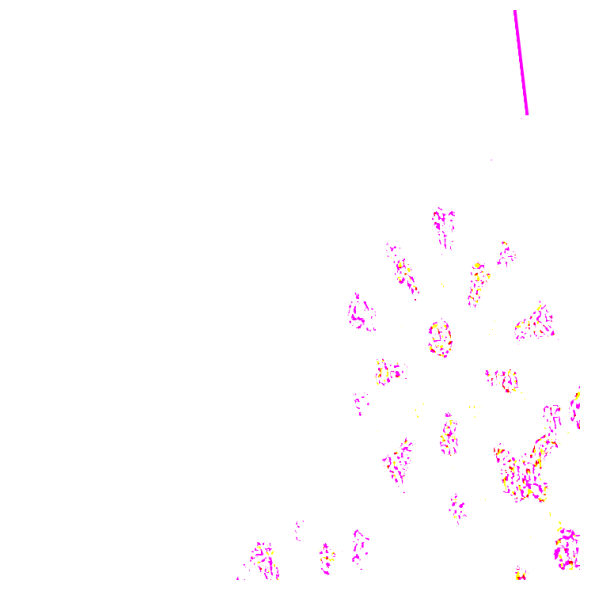

In [6]:
# Display the augmented image with proper scaling
plt.figure(figsize=(6, 6))
plt.imshow(preprocessed_image)
plt.axis('off')  # Hide axes for a cleaner image display
plt.tight_layout() 
plt.show()

In [7]:
!pip install ultralytics

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 14.7 MB/s eta 0:00:00


In [8]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n.pt') 

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 80.6MB/s]


In [9]:
# Train the model
model.train(
    data='/kaggle/input/hospital-tools-dataset/data_isya/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16
)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/hospital-tools-dataset/data_isya/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 16.2MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 71.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/hospital-tools-dataset/data_isya/train/labels... 245 images, 2 backgrounds, 0 corrupt: 100%|██████████| 245/245 [00:01<00:00, 204.63it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/hospital-tools-dataset/data_isya/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/hospital-tools-dataset/data_isya/valid/labels... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<00:00, 209.91it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/hospital-tools-dataset/data_isya/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.25G      1.447      3.783      1.598         31        640: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         70        174     0.0104      0.787      0.235      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.21G      1.267       3.09      1.461         19        640: 100%|██████████| 16/16 [00:02<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]

                   all         70        174    0.00813      0.813      0.386      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.23G      1.268      2.407      1.465         28        640: 100%|██████████| 16/16 [00:02<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         70        174      0.626       0.28      0.387      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.24G      1.275      1.978      1.448         26        640: 100%|██████████| 16/16 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         70        174      0.661      0.425      0.533      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.23G       1.28      1.971      1.434         32        640: 100%|██████████| 16/16 [00:02<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]

                   all         70        174      0.692      0.536      0.656      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.23G      1.288      1.891      1.445         20        640: 100%|██████████| 16/16 [00:02<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         70        174      0.594      0.591      0.669      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.24G      1.258      1.803      1.421         15        640: 100%|██████████| 16/16 [00:02<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]

                   all         70        174      0.641      0.606      0.647      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.28G      1.317      1.811      1.455         23        640: 100%|██████████| 16/16 [00:02<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         70        174      0.618      0.496      0.578      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.21G      1.243      1.645      1.404         21        640: 100%|██████████| 16/16 [00:02<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]

                   all         70        174      0.585      0.637      0.643      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.23G       1.22      1.672      1.419         26        640: 100%|██████████| 16/16 [00:02<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]

                   all         70        174      0.624      0.579       0.64      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.26G      1.255      1.605      1.397         16        640: 100%|██████████| 16/16 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]

                   all         70        174      0.595      0.673      0.673      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.26G      1.178      1.454      1.354         26        640: 100%|██████████| 16/16 [00:02<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]

                   all         70        174      0.662      0.718      0.725      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.23G      1.233      1.521      1.379         16        640: 100%|██████████| 16/16 [00:02<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         70        174      0.719      0.654       0.68      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.24G      1.168      1.479      1.368         18        640: 100%|██████████| 16/16 [00:02<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all         70        174      0.823      0.635      0.735      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.22G      1.154      1.424       1.36         15        640: 100%|██████████| 16/16 [00:02<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]

                   all         70        174      0.679      0.632      0.688      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.21G      1.127      1.427      1.317         23        640: 100%|██████████| 16/16 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all         70        174       0.67       0.72      0.688      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.23G      1.158      1.421      1.353         40        640: 100%|██████████| 16/16 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]

                   all         70        174      0.621      0.729      0.718      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.22G      1.151      1.362       1.34         18        640: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]

                   all         70        174      0.755      0.686      0.722      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.23G      1.111      1.309      1.293         30        640: 100%|██████████| 16/16 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]

                   all         70        174      0.736      0.688      0.753      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.24G       1.13      1.315      1.323         10        640: 100%|██████████| 16/16 [00:02<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]

                   all         70        174      0.791      0.746      0.814      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.24G      1.102      1.335      1.322         21        640: 100%|██████████| 16/16 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]

                   all         70        174      0.785      0.754      0.822       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.21G      1.099      1.286      1.309         32        640: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]

                   all         70        174      0.802      0.733       0.77      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.23G      1.137      1.297      1.304         38        640: 100%|██████████| 16/16 [00:02<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         70        174      0.789       0.74       0.79      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.23G      1.085      1.262      1.309         20        640: 100%|██████████| 16/16 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]

                   all         70        174      0.801      0.757      0.822      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.23G      1.068      1.186      1.298         21        640: 100%|██████████| 16/16 [00:02<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]

                   all         70        174      0.797      0.704      0.739      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.24G      1.043      1.135      1.255         32        640: 100%|██████████| 16/16 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all         70        174      0.801      0.762      0.767      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.23G      1.069      1.157      1.284         32        640: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

                   all         70        174       0.82      0.796      0.809      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.24G      1.037      1.116       1.26         13        640: 100%|██████████| 16/16 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]

                   all         70        174      0.852      0.761       0.83       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.2G      1.035      1.172      1.292         26        640: 100%|██████████| 16/16 [00:02<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]

                   all         70        174      0.873      0.821      0.866      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.23G      1.013       1.07      1.235         24        640: 100%|██████████| 16/16 [00:02<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         70        174      0.861       0.76      0.841      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.24G      1.001        1.1      1.231         12        640: 100%|██████████| 16/16 [00:02<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]

                   all         70        174      0.864      0.803       0.85      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.21G       1.02      1.113      1.249         34        640: 100%|██████████| 16/16 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         70        174      0.816      0.741      0.805      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.21G      1.011      1.073      1.236         21        640: 100%|██████████| 16/16 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]

                   all         70        174      0.817      0.765        0.8      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.23G     0.9576      1.003      1.225         28        640: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]

                   all         70        174      0.865      0.744      0.824      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.21G      0.946      1.037      1.216         22        640: 100%|██████████| 16/16 [00:02<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]

                   all         70        174      0.871      0.803      0.867      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.24G     0.9565      1.012      1.201         25        640: 100%|██████████| 16/16 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]

                   all         70        174      0.925      0.797      0.889      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.24G     0.9453     0.9667      1.185         37        640: 100%|██████████| 16/16 [00:02<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]

                   all         70        174      0.828      0.789       0.84      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.23G     0.9463      1.027      1.228         29        640: 100%|██████████| 16/16 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]

                   all         70        174      0.884       0.81      0.866      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.23G     0.8818     0.9443      1.166         23        640: 100%|██████████| 16/16 [00:02<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]

                   all         70        174      0.861       0.82      0.869      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.23G     0.9033     0.9644      1.186         24        640: 100%|██████████| 16/16 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]

                   all         70        174      0.816      0.841      0.867      0.546


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.23G     0.9244      1.058      1.221         20        640: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]

                   all         70        174      0.867      0.797      0.848      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.23G     0.8907     0.9882      1.173          5        640: 100%|██████████| 16/16 [00:02<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         70        174      0.824      0.775      0.825      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.24G     0.8175     0.9388      1.157          6        640: 100%|██████████| 16/16 [00:02<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         70        174      0.891      0.764      0.852      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.2G     0.8455     0.9725      1.167         14        640: 100%|██████████| 16/16 [00:02<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]

                   all         70        174      0.858      0.826      0.882      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.23G     0.8108     0.9262      1.135         27        640: 100%|██████████| 16/16 [00:02<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]

                   all         70        174      0.883      0.847      0.916      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.23G     0.8028     0.8999      1.116         15        640: 100%|██████████| 16/16 [00:02<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         70        174      0.852      0.877      0.917      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.21G     0.7802     0.8712      1.129          5        640: 100%|██████████| 16/16 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]

                   all         70        174      0.913      0.823      0.912      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.21G      0.815     0.8646      1.135         17        640: 100%|██████████| 16/16 [00:02<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]

                   all         70        174      0.901       0.86      0.913      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.21G     0.7799     0.8765      1.121         14        640: 100%|██████████| 16/16 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]

                   all         70        174      0.904      0.863      0.909      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.23G     0.7801     0.8491      1.116         16        640: 100%|██████████| 16/16 [00:02<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]

                   all         70        174      0.905      0.852      0.909      0.582



50 epochs completed in 0.051 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]


                   all         70        174      0.901       0.86      0.913      0.591
                   bed         11         13          1      0.874      0.986       0.71
                hazmat         10         15      0.959          1      0.995      0.792
                masker         18         30      0.926        0.9      0.949      0.472
        tabung oksigen         10         49      0.977      0.851      0.915      0.567
                vaksin         10         22      0.947      0.806      0.872      0.638
            ventilator         10         10      0.942        0.9      0.986      0.469
          virus corona         10         35      0.559      0.686      0.687      0.491
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d1919918ac0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [10]:
# Save the trained YOLOv8 model
model.save('/kaggle/working/yolov8_trained.pt')

In [11]:
from ultralytics import YOLO

# Load the saved model
model = YOLO('/kaggle/working/yolov8_trained.pt')

# Perform inference on new data
results = model.predict('/kaggle/input/hospital-tools-dataset/data_isya/test/images/o46_jpg.rf.cb3a27ebd0d761e1ca8510703ae0f614.jpg', save=True)



image 1/1 /kaggle/input/hospital-tools-dataset/data_isya/test/images/o46_jpg.rf.cb3a27ebd0d761e1ca8510703ae0f614.jpg: 640x640 7 tabung oksigens, 7.2ms
Speed: 2.6ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [12]:
# Evaluate the model's performance on the validation/test set
metrics = model.val()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/hospital-tools-dataset/data_isya/valid/labels... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<00:00, 503.28it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/hospital-tools-dataset/data_isya/valid is not writeable, cache not saved.



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]


                   all         70        174      0.901       0.86      0.913      0.591
                   bed         11         13          1      0.874      0.986       0.71
                hazmat         10         15      0.959          1      0.995      0.792
                masker         18         30      0.926        0.9      0.949      0.469
        tabung oksigen         10         49      0.977      0.851      0.915      0.567
                vaksin         10         22      0.947      0.808      0.872      0.638
            ventilator         10         10      0.942        0.9      0.986      0.469
          virus corona         10         35      0.559      0.686      0.688      0.491
Speed: 0.3ms preprocess, 8.9ms inference, 0.0ms loss, 14.6ms postprocess per image
Results saved to runs/detect/val


In [13]:
# Access the mean results (precision, recall, mAP, etc.)
mean_results = metrics.mean_results()

# Display the evaluation metrics
print("Evaluation Metrics:")
print(f"Mean AP@50: {mean_results[0]:.4f}")  # Mean Average Precision at IoU=0.5
print(f"Mean AP@0.5-0.95: {mean_results[1]:.4f}")  # Mean Average Precision at IoU=0.5 to 0.95
print(f"Mean Precision: {mean_results[2]:.4f}")  # Mean Precision
print(f"Mean Recall: {mean_results[3]:.4f}")  # Mean Recall

Evaluation Metrics:
Mean AP@50: 0.9014
Mean AP@0.5-0.95: 0.8597
Mean Precision: 0.9130
Mean Recall: 0.5907


In [14]:
# Access prediction details
for result in results:
    print(f"Image Path: {result.path}")
    print(f"Predicted Boxes: {result.boxes.xyxy}")  # Bounding box coordinates
    print(f"Confidence Scores: {result.boxes.conf}")  # Confidence scores
    print(f"Class IDs: {result.boxes.cls}")  # Predicted class IDs
    print(f"Class Names: {result.names}")  # Class names

Image Path: /kaggle/input/hospital-tools-dataset/data_isya/test/images/o46_jpg.rf.cb3a27ebd0d761e1ca8510703ae0f614.jpg
Predicted Boxes: tensor([[267.9330,  97.5377, 402.3661, 719.9842],
        [614.7542,  70.1713, 719.7769, 720.0000],
        [161.8181,  96.0962, 291.9570, 718.8014],
        [391.5485,  98.9671, 532.2606, 717.7143],
        [393.3096,  98.8731, 467.7483, 720.0000],
        [ 43.0151, 128.9231, 242.4248, 719.0538],
        [376.8698,  81.0807, 611.3871, 718.5116]], device='cuda:0')
Confidence Scores: tensor([0.8693, 0.7375, 0.5022, 0.4944, 0.4592, 0.4464, 0.4122], device='cuda:0')
Class IDs: tensor([3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
Class Names: {0: 'bed', 1: 'hazmat', 2: 'masker', 3: 'tabung oksigen', 4: 'vaksin', 5: 'ventilator', 6: 'virus corona'}


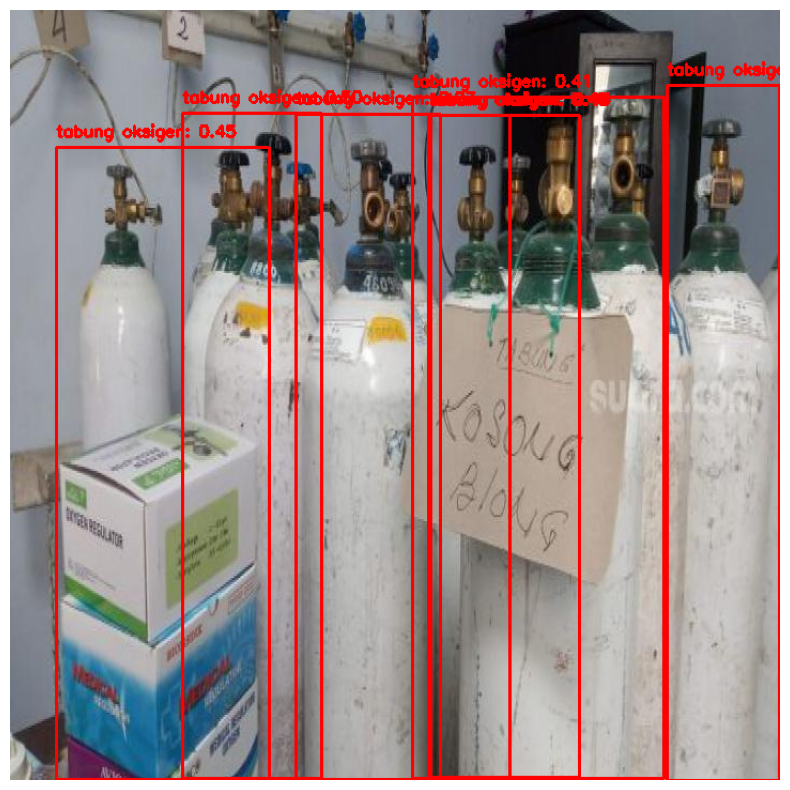

In [15]:
import cv2
import matplotlib.pyplot as plt

image_path = results[0].path 
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Extract prediction details
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates
    scores = result.boxes.conf.cpu().numpy()  # Confidence scores
    class_ids = result.boxes.cls.cpu().numpy().astype(int)  # Class IDs
    class_names = result.names  # Class names dictionary

    for box, score, class_id in zip(boxes, scores, class_ids):
        # Draw bounding box
        x1, y1, x2, y2 = map(int, box)
        color = (255, 0, 0)  # Red color for bounding box
        image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Add class label and confidence score
        label = f"{class_names[class_id]}: {score:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        image = cv2.putText(image, label, (x1, y1 - 10), font, 0.5, color, 2)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()
